### Stock Market Prediction And Forecasting Using  LSTM

In [2]:
import pandas_datareader as pdr
key="bf87d7dcfe6845217fc101ed35276719f598657c"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\sujal\AppData\Local\Temp\ipykernel_17016\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-19 00:00:00+00:00,191.88,192.55,189.69,189.69,20286752,45.839881,45.999943,45.316693,45.316693,81147008,0.0,1.0
1,AAPL,2018-07-20 00:00:00+00:00,191.44,192.43,190.17,191.78,20706042,45.734766,45.971275,45.431364,45.815991,82824168,0.0,1.0
2,AAPL,2018-07-23 00:00:00+00:00,191.61,191.96,189.56,190.68,15989365,45.775378,45.858993,45.285636,45.553203,63957460,0.0,1.0
3,AAPL,2018-07-24 00:00:00+00:00,193.00,193.66,192.05,192.45,18697898,46.107448,46.265121,45.880494,45.976053,74791592,0.0,1.0
4,AAPL,2018-07-25 00:00:00+00:00,194.82,194.85,192.43,193.06,16826483,46.542243,46.549410,45.971275,46.121782,67305932,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-11 00:00:00+00:00,188.08,189.3000,186.60,189.16,46638119,188.08,189.3000,186.60,189.16,46638119,0.0,1.0
1252,AAPL,2023-07-12 00:00:00+00:00,189.77,191.7000,188.47,189.68,60750248,189.77,191.7000,188.47,189.68,60750248,0.0,1.0
1253,AAPL,2023-07-13 00:00:00+00:00,190.54,191.1900,189.78,190.50,41342338,190.54,191.1900,189.78,190.50,41342338,0.0,1.0
1254,AAPL,2023-07-14 00:00:00+00:00,190.69,191.1799,189.63,190.23,41616242,190.69,191.1799,189.63,190.23,41616242,0.0,1.0
1255,AAPL,2023-07-17 00:00:00+00:00,193.99,194.3200,191.81,191.90,50520159,193.99,194.3200,191.81,191.90,50520159,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       191.88
1       191.44
2       191.61
3       193.00
4       194.82
         ...  
1251    188.08
1252    189.77
1253    190.54
1254    190.69
1255    193.99
Name: close, Length: 1256, dtype: float64

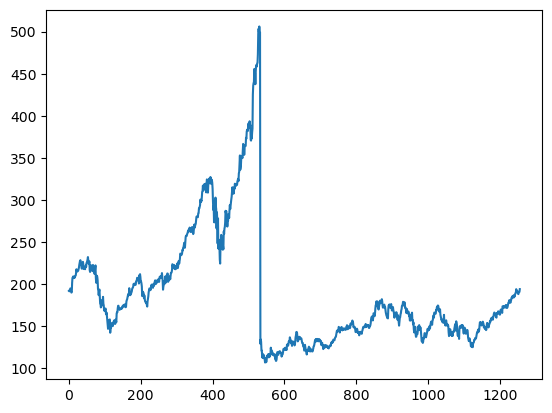

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np

In [13]:
df1

0       191.88
1       191.44
2       191.61
3       193.00
4       194.82
         ...  
1251    188.08
1252    189.77
1253    190.54
1254    190.69
1255    193.99
Name: close, Length: 1256, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.21299937]
 [0.21189731]
 [0.21232311]
 ...
 [0.20964308]
 [0.21001879]
 [0.21828428]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(816, 440)

In [18]:
train_data

array([[2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],
       [2.86111459e-01],
       [2.99486537e-01],


In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 175ms/step - loss: 0.0449 - val_loss: 0.0016
Epoch 2/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0169 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0111 - val_loss: 3.9112e-04
Epoch 4/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0098 - val_loss: 4.7433e-04
Epoch 5/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0086 - val_loss: 3.1542e-04
Epoch 6/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0077 - val_loss: 4.1678e-04
Epoch 7/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0079 - val_loss: 8.7629e-04
Epoch 8/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0066 - val_loss: 6.8944e-04
Epoch 9/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0060 - val_loss: 2.7046e-04
Epoch 10/100
12/12 [==============================] - 1s 104ms/

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.13.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 19ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.92882727128662

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.58801254807094

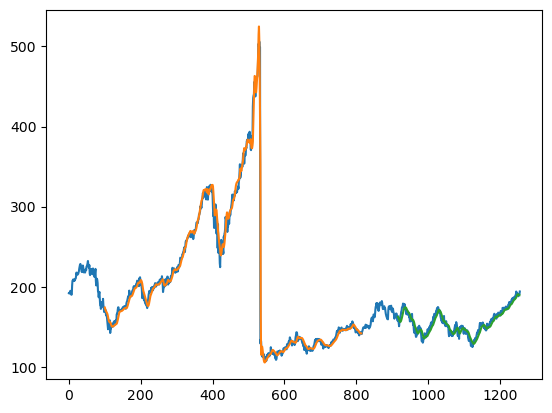

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [37]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584

In [58]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #shifting one postion ahead
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #first cycle will start from here 
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20834887]
100
[0.20834887]
101
2 day input [0.09986224 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253
 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799
 0.11458986 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627
 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.2064

In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

1256

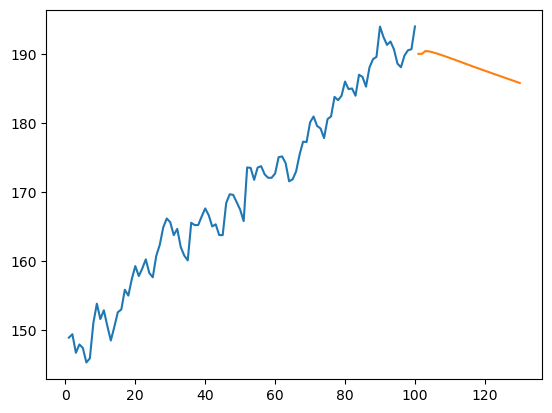

In [65]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

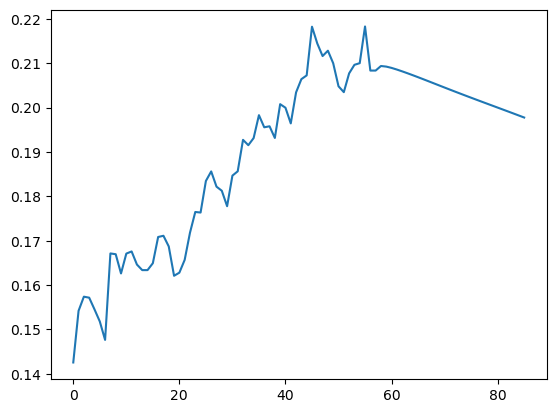

In [66]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [67]:
df3=scaler.inverse_transform(df3).tolist()

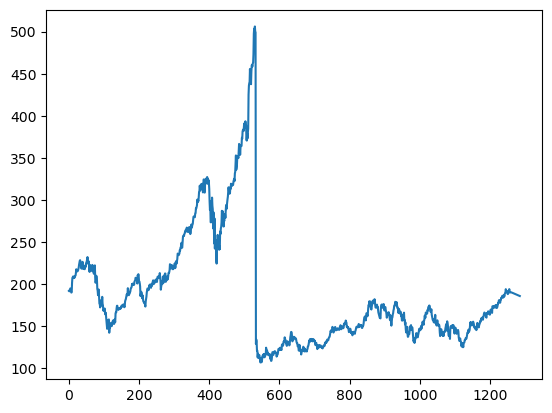

In [68]:
plt.plot(df3)